In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [135]:

# Load the newly uploaded file
file_path = '/home/binit/HistoryOfNepal/Amusement_Park_Competitor_Analysis.xlsx - Park wise.csv'
competitor_data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
competitor_data.head()

,Year,City,Amusement Parks,Ticket price Average,Average Daily Footfalls,Revenue,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,2023
0,2017,Mumbai,Imagicaaworld,796,1678,"111,880,730",NaN,NaN,NaN,NaN,NaN,NaN
1,2017,Mumbai,EsselWorld,796,1678,"103,274,520",NaN,NaN,NaN,NaN,NaN,NaN
2,2017,Mumbai,Water Kingdom,796,1678,"292,611,141",NaN,NaN,NaN,NaN,NaN,NaN
3,2017,Mumbai,KidZania Mumbai,796,1678,"137,699,360",NaN,NaN,NaN,NaN,NaN,NaN
4,2017,Delhi,Worlds of Wonder,462,1582,"50,950,705",NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
competitor_data.isnull().sum()

Year                         0
City                         0
Amusement Parks              0
Ticket price Average         0
Average Daily Footfalls      0
Revenue                      0
Unnamed: 6                 196
Unnamed: 7                 196
Unnamed: 8                 196
Unnamed: 9                 196
Unnamed: 10                196
2023                       196
dtype: int64

In [137]:
competitor_data.columns

Index(['Year ', 'City ', 'Amusement Parks', 'Ticket price Average ',
       'Average Daily Footfalls', 'Revenue', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', '2023'],
      dtype='object')

In [138]:
print(competitor_data.columns)


Index(['Year ', 'City ', 'Amusement Parks', 'Ticket price Average ',
       'Average Daily Footfalls', 'Revenue', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', '2023'],
      dtype='object')


In [139]:
competitor_data['Ticket price Average ']= competitor_data['Ticket price Average '] * 1.6
competitor_data['Revenue'] = competitor_data['Revenue'].str.replace(',', '').str.strip()
competitor_data



,Year,City,Amusement Parks,Ticket price Average,Average Daily Footfalls,Revenue,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,2023
0,2017,Mumbai,Imagicaaworld,1273.6,1678,111880730,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,Mumbai,EsselWorld,1273.6,1678,103274520,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,Mumbai,Water Kingdom,1273.6,1678,292611141,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,Mumbai,KidZania Mumbai,1273.6,1678,137699360,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,Delhi,Worlds of Wonder,739.2,1582,50950705,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
191,2023,Hyderabad,Ocean Park,916.8,1564,69252448,NaN,NaN,NaN,NaN,NaN,NaN
192,2023,Pune,Imagicaaworld,977.6,1690,219925072,NaN,NaN,NaN,NaN,NaN,NaN
193,2023,Pune,Sentosa Water Park,977.6,1690,166839710,NaN,NaN,NaN,NaN,NaN,NaN
194,2023,Pune,Adlabs Aquamagica,977.6,1690,136505217,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
competitor_data.isnull().sum()

Year                         0
City                         0
Amusement Parks              0
Ticket price Average         0
Average Daily Footfalls      0
Revenue                      0
Unnamed: 6                 196
Unnamed: 7                 196
Unnamed: 8                 196
Unnamed: 9                 196
Unnamed: 10                196
2023                       196
dtype: int64

In [141]:
# Dropping the specified columns
columns_to_remove = ['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', '2023']
df= competitor_data.drop(columns=columns_to_remove, errors='ignore')




In [142]:
df.to_csv('cleaned_competitor_data_park.csv', index=False)

In [143]:
df.head()

,Year,City,Amusement Parks,Ticket price Average,Average Daily Footfalls,Revenue
0,2017,Mumbai,Imagicaaworld,1273.6,1678,111880730
1,2017,Mumbai,EsselWorld,1273.6,1678,103274520
2,2017,Mumbai,Water Kingdom,1273.6,1678,292611141
3,2017,Mumbai,KidZania Mumbai,1273.6,1678,137699360
4,2017,Delhi,Worlds of Wonder,739.2,1582,50950705


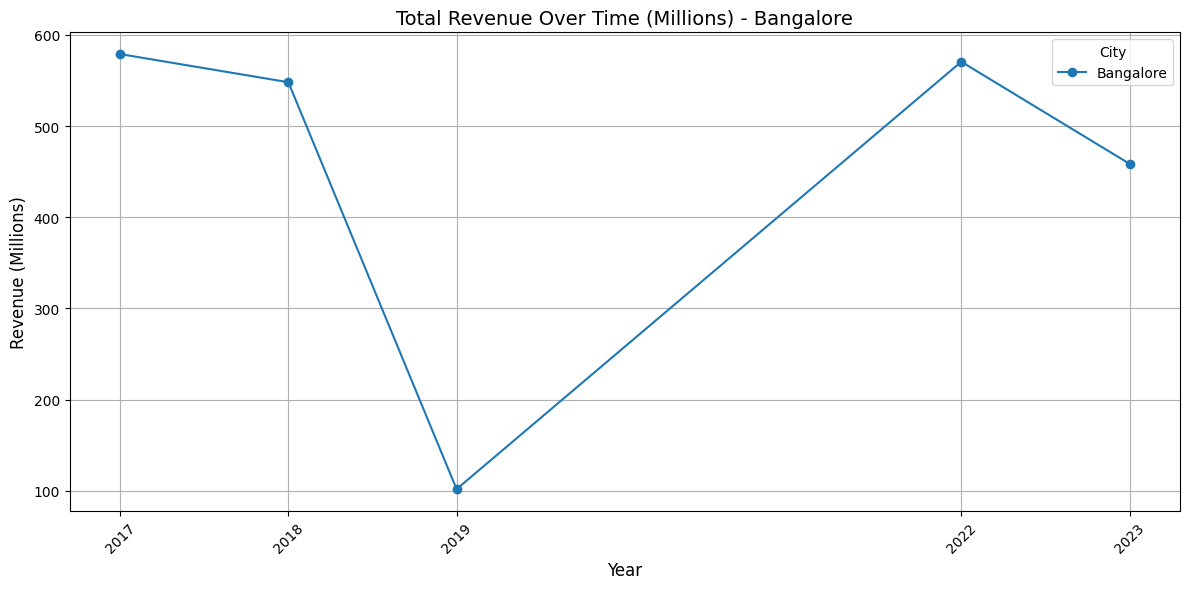

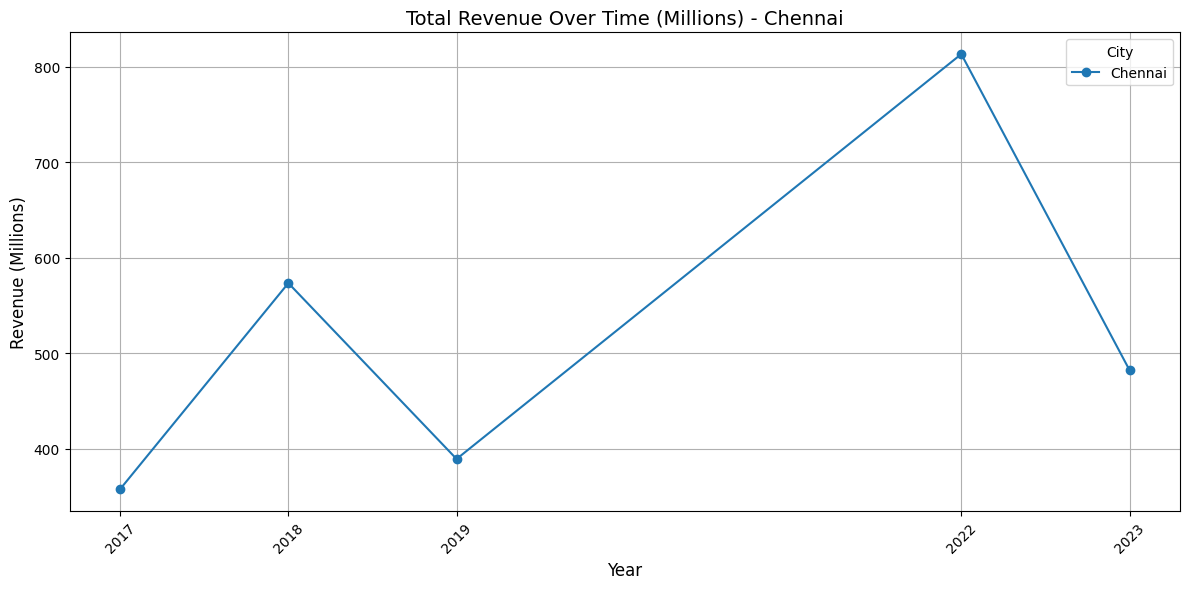

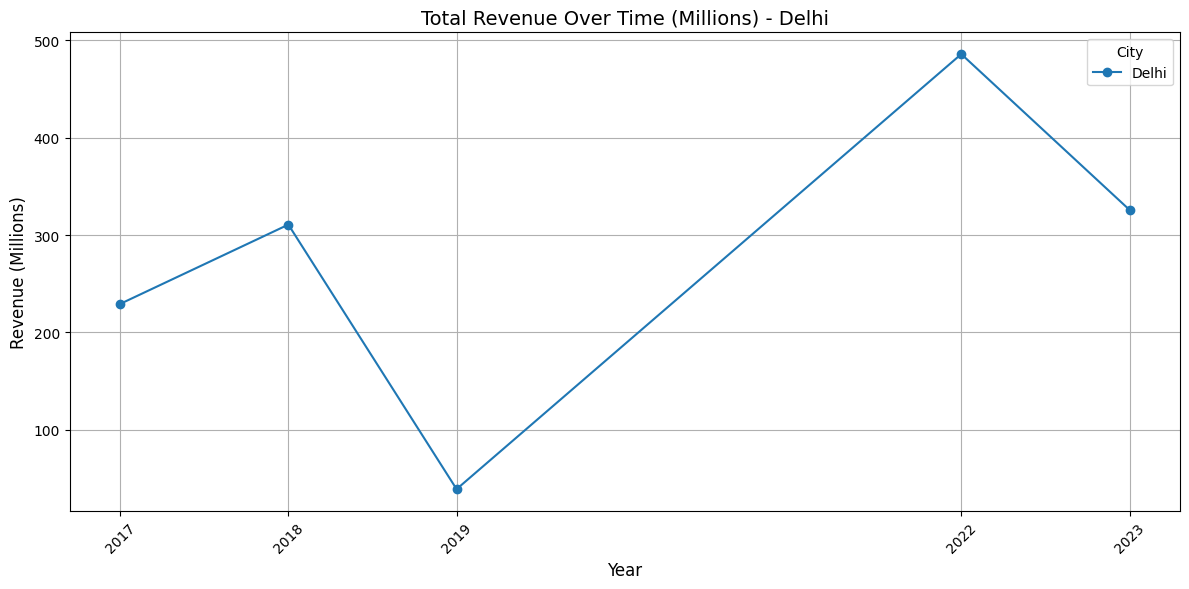

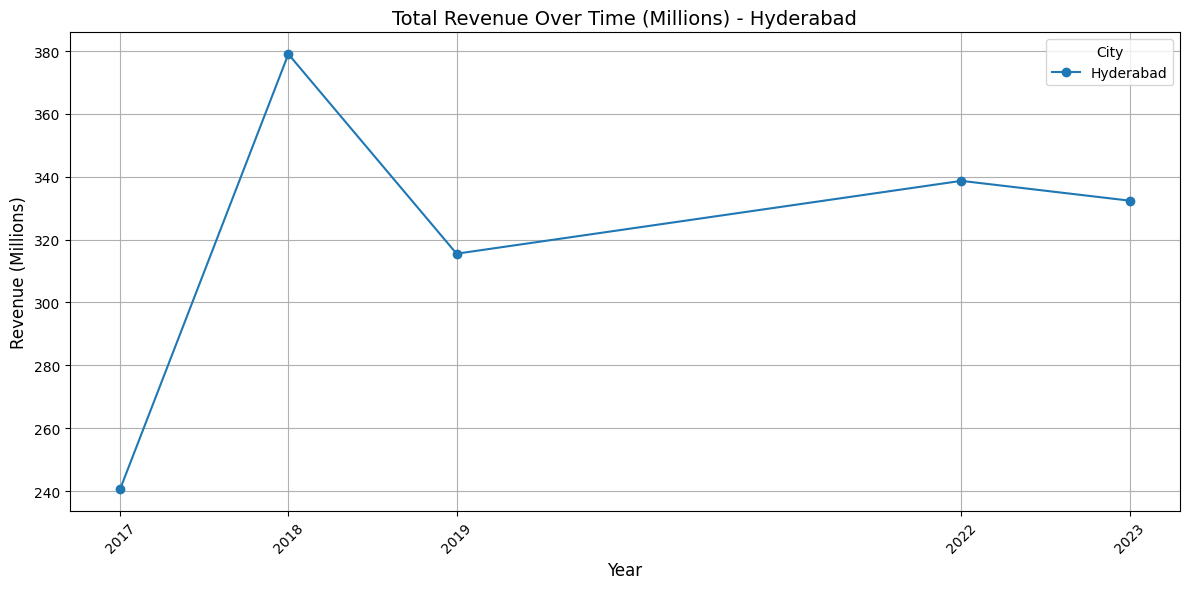

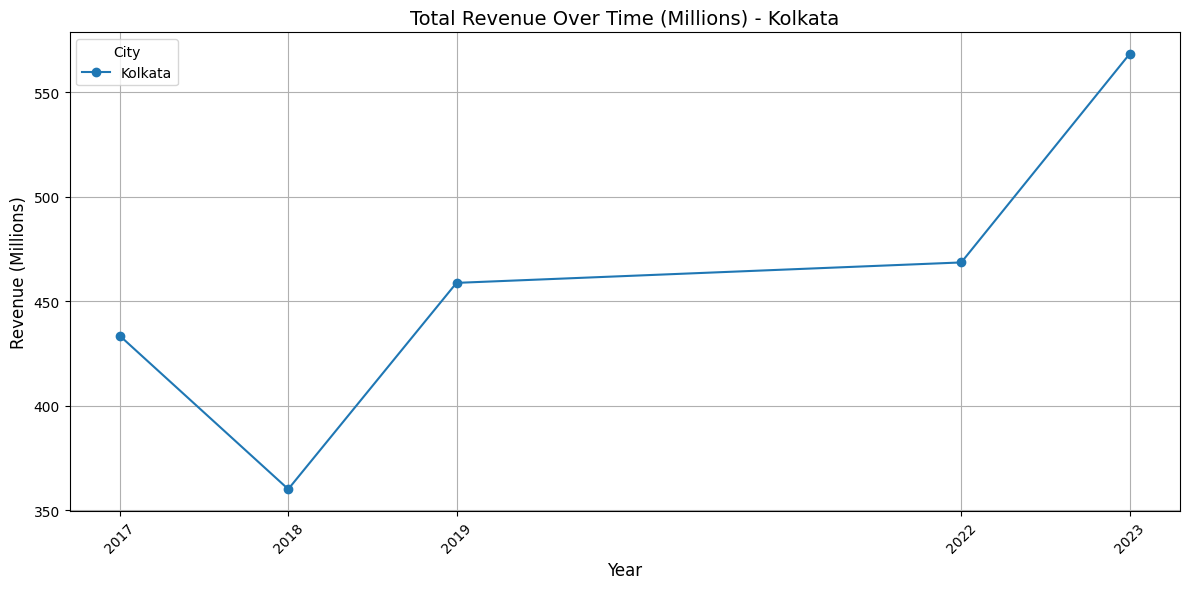

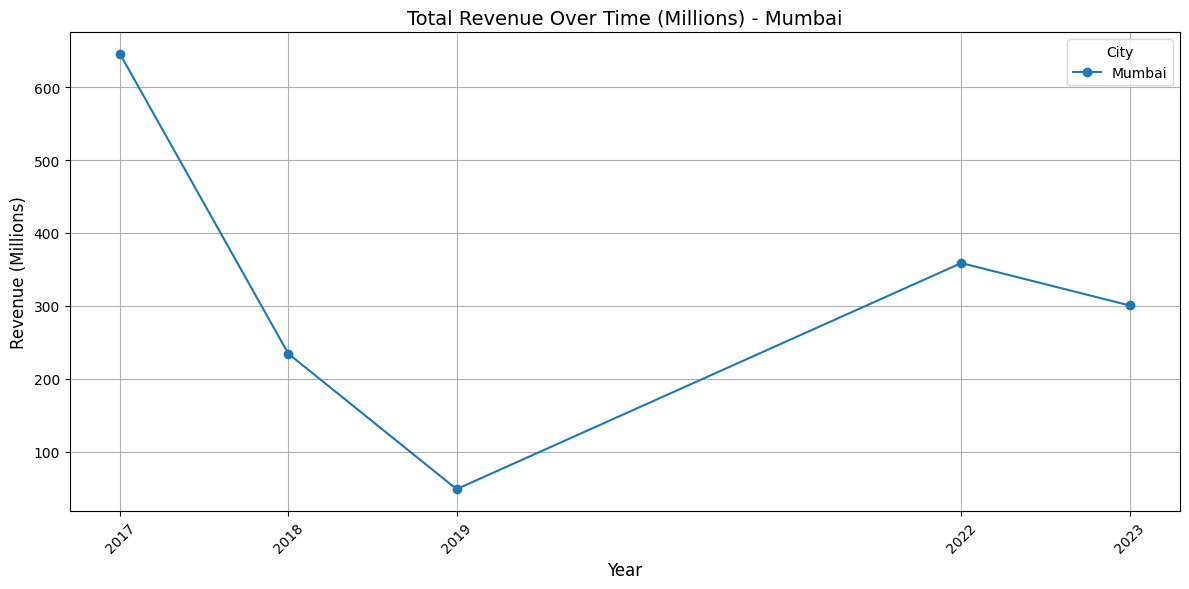

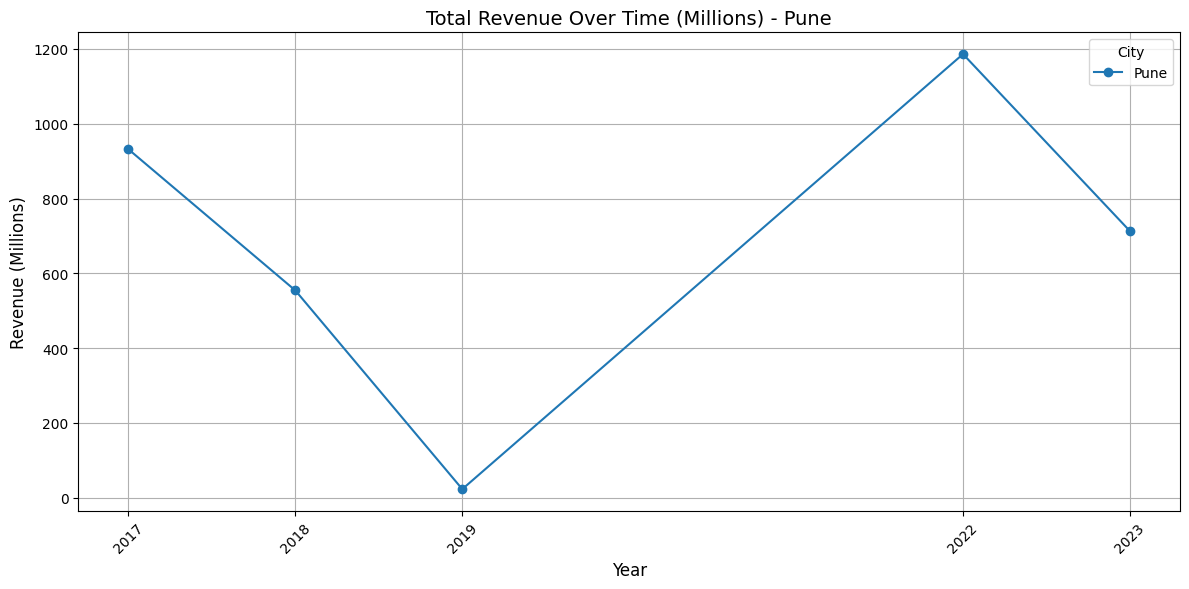

In [144]:
import matplotlib.pyplot as plt

# Clean column names to remove leading/trailing spaces and special characters
df.columns = df.columns.str.strip()

# Check if 'Year' exists after cleaning
if 'Year' in df.columns:
    # Clean the dataset
    df['Revenue'] = pd.to_numeric(
        df['Revenue'].replace({',': '', '  -   ': None}, regex=True),
        errors='coerce'
    )
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    df['City'] = df['City'].str.strip()
    df['Ticket price Average'] = pd.to_numeric(
        df['Ticket price Average'].replace({'  -   ': None}, regex=True),
        errors='coerce'
    )

    # Drop rows with invalid data
    df = df.dropna(subset=['Revenue', 'Year', 'Ticket price Average'])

    # Convert revenue to millions for easier readability
    df['Revenue (Millions)'] = df['Revenue'] / 1_000_000

    # Total revenue over time for each location
    total_revenue_by_city = df.groupby(['Year', 'City'])['Revenue (Millions)'].sum().reset_index()

    # Plot total revenue over time for each location
    cities = total_revenue_by_city['City'].unique()
    for city in cities:
        city_data = total_revenue_by_city[total_revenue_by_city['City'] == city]
        plt.figure(figsize=(12, 6))
        plt.plot(city_data['Year'], city_data['Revenue (Millions)'], marker='o', label=city)
        plt.title(f'Total Revenue Over Time (Millions) - {city}', fontsize=14)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Revenue (Millions)', fontsize=12)
        plt.xticks(city_data['Year'], rotation=45, fontsize=10)
        plt.legend(title='City', fontsize=10)
        plt.grid(True)
        plt.tight_layout()
        plt.show()





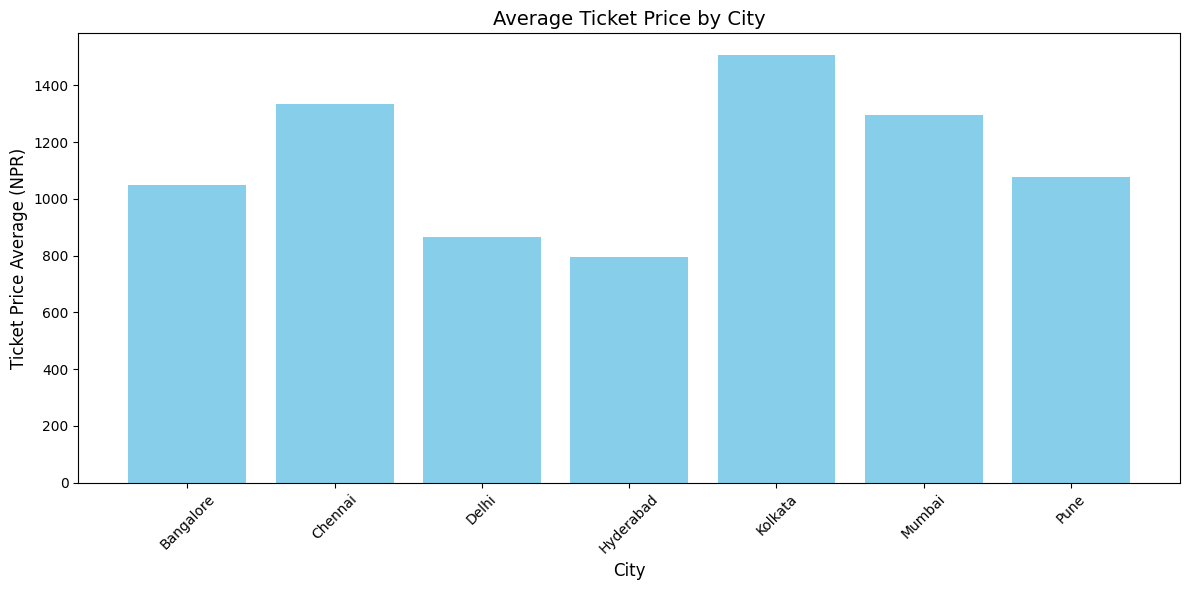

In [145]:
# Visualize ticket prices for all locations
ticket_price_by_city = df.groupby('City')['Ticket price Average'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(ticket_price_by_city['City'], ticket_price_by_city['Ticket price Average'], color='skyblue')
plt.title('Average Ticket Price by City', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Ticket Price Average (NPR)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

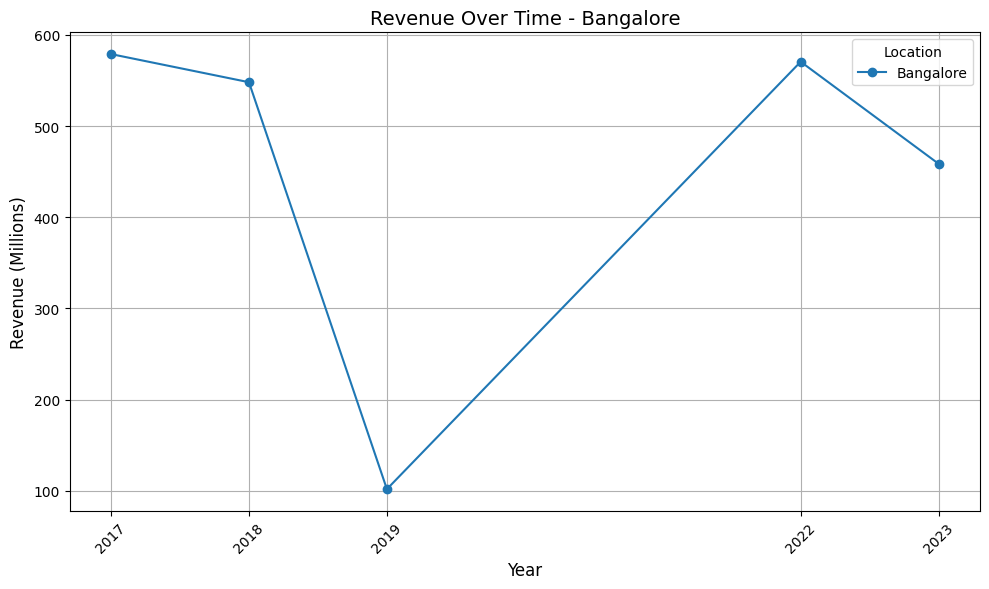

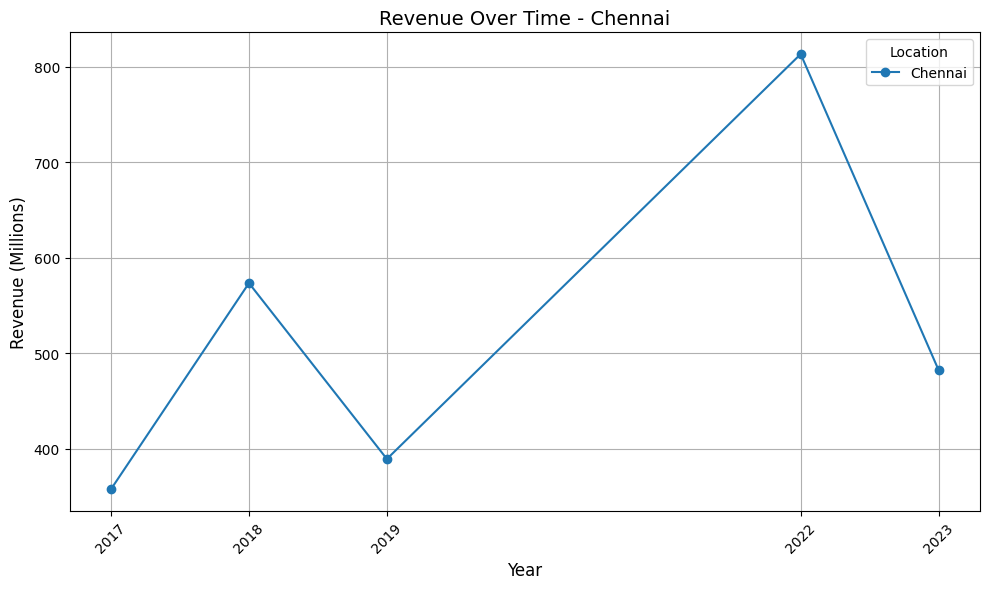

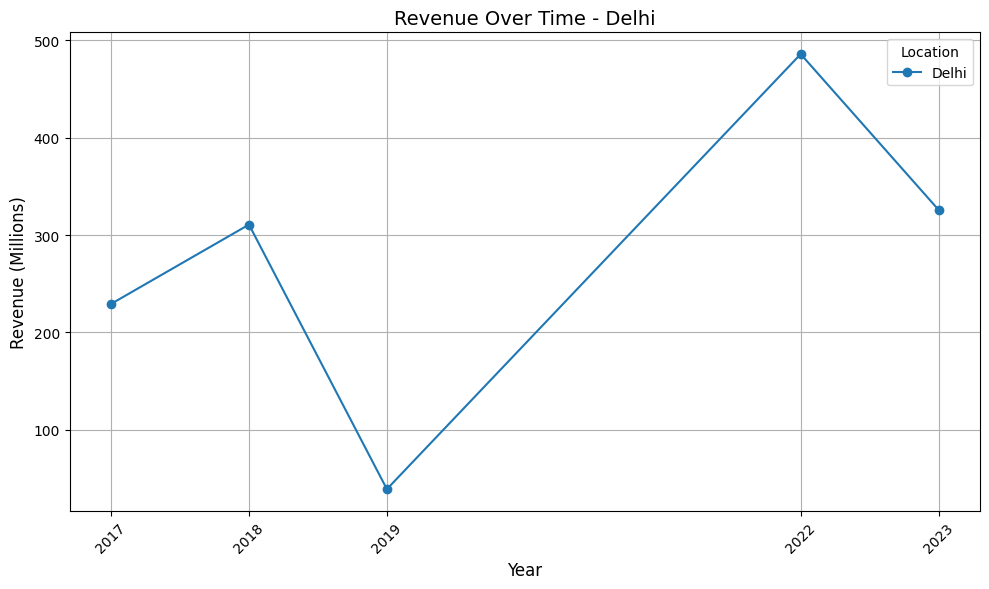

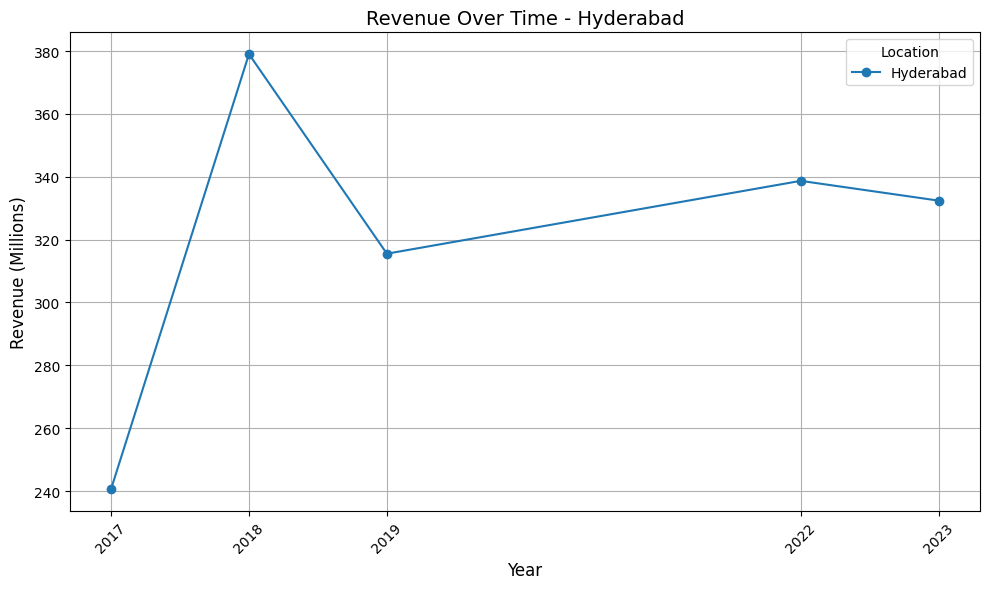

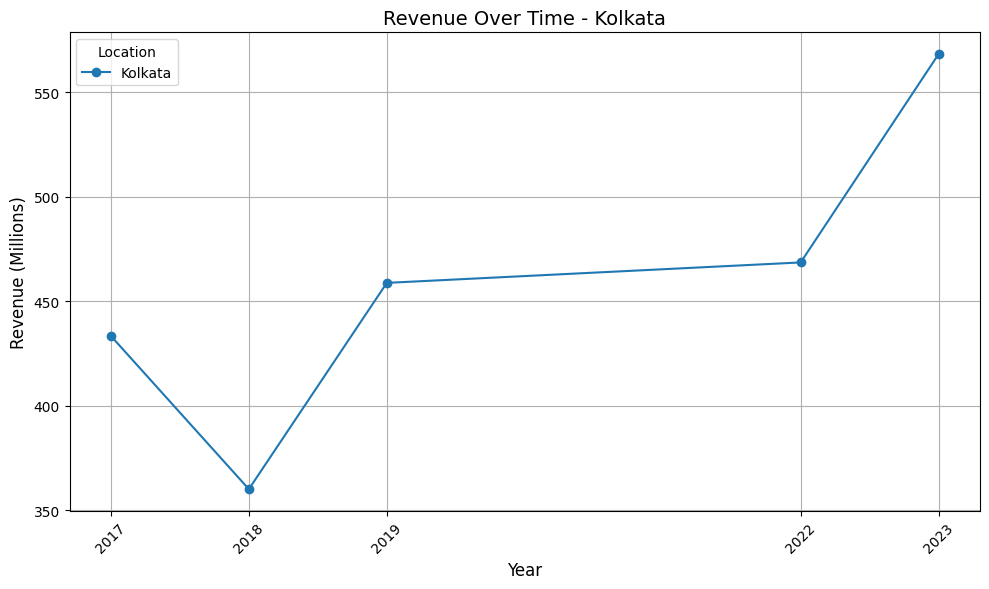

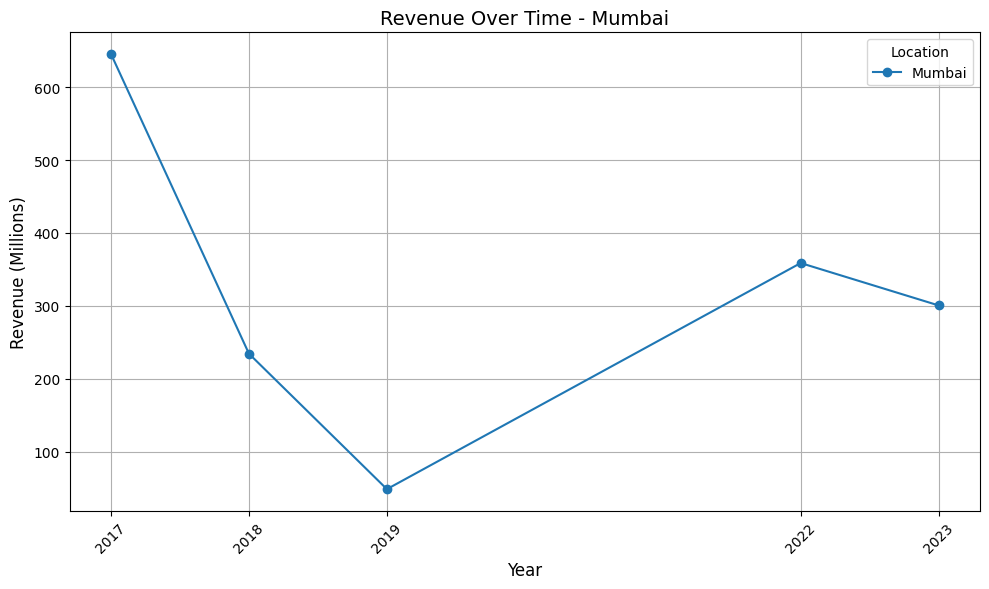

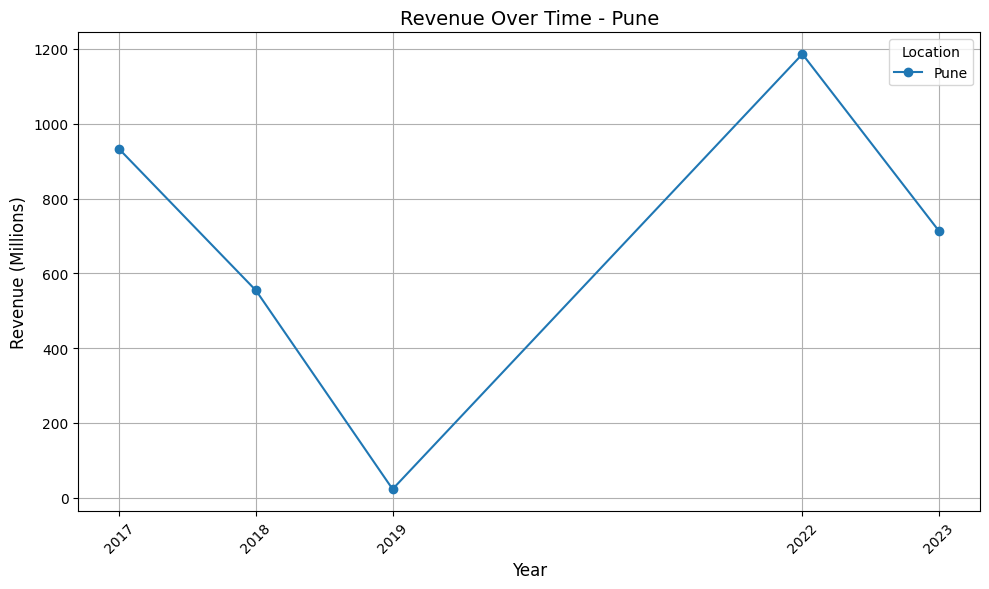

In [146]:
# Visualize revenue over time for all locations using line plots
import matplotlib.pyplot as plt

# Ensure 'df' is grouped by location and year for visualization
revenue_over_time = df.groupby(['Year', 'City'])['Revenue (Millions)'].sum().reset_index()

# Get unique locations
locations = revenue_over_time['City'].unique()

# Create a line plot for each location
for location in locations:
    location_data = revenue_over_time[revenue_over_time['City'] == location]
    plt.figure(figsize=(10, 6))
    plt.plot(location_data['Year'], location_data['Revenue (Millions)'], marker='o', label=location)
    plt.title(f'Revenue Over Time - {location}', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Revenue (Millions)', fontsize=12)
    plt.xticks(location_data['Year'], rotation=45)
    plt.legend(title='Location', fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [147]:
import pandas as pd

# Function to create a summary for a given city
def create_summary(city, year_filter=None):
    if year_filter:
        filtered_df = df[df['Year'] == year_filter]
    else:
        filtered_df = df

    revenue_all_years = filtered_df[filtered_df['City'] == city]['Revenue (Millions)'].sum()
    revenue_2023 = (
        filtered_df[(filtered_df['City'] == city) & (filtered_df['Year'] == 2023)]['Revenue (Millions)'].sum()
        if year_filter is None
        else revenue_all_years
    )
    ticket_price_avg = filtered_df[filtered_df['City'] == city]['Ticket price Average'].mean()
    daily_footfalls_avg = filtered_df[filtered_df['City'] == city]['Average Daily Footfalls'].mean()

    return {
        "City Name": city,
        "Revenue (All Years, M)": revenue_all_years,
        "Revenue (2023, M)": revenue_2023,
        "Ticket Price Avg (NPR)": ticket_price_avg,
        "Avg Daily Footfalls": daily_footfalls_avg,
    }

# Calculate total revenue for each location
total_revenue_by_city = df.groupby('City')['Revenue (Millions)'].sum().reset_index()

# Find the highest and lowest revenue locations for all years
highest_revenue_location_all_years = total_revenue_by_city.loc[total_revenue_by_city['Revenue (Millions)'].idxmax()]
lowest_revenue_location_all_years = total_revenue_by_city.loc[total_revenue_by_city['Revenue (Millions)'].idxmin()]

# Create summaries for highest and lowest revenue locations for all years
highest_revenue_summary_all_years = create_summary(highest_revenue_location_all_years['City'])
lowest_revenue_summary_all_years = create_summary(lowest_revenue_location_all_years['City'])

# Create a DataFrame for all years
summary_table_all_years = pd.DataFrame([
    {
        "Place Type": "Highest Revenue Place (All Years)",
        **highest_revenue_summary_all_years
    },
    {
        "Place Type": "Lowest Revenue Place (All Years)",
        **lowest_revenue_summary_all_years
    }
])

# For the year 2023
total_revenue_by_city_2023 = df[df['Year'] == 2023].groupby('City')['Revenue (Millions)'].sum().reset_index()

highest_revenue_location_2023 = total_revenue_by_city_2023.loc[total_revenue_by_city_2023['Revenue (Millions)'].idxmax()]
lowest_revenue_location_2023 = total_revenue_by_city_2023.loc[total_revenue_by_city_2023['Revenue (Millions)'].idxmin()]

highest_revenue_summary_2023 = create_summary(highest_revenue_location_2023['City'], year_filter=2023)
lowest_revenue_summary_2023 = create_summary(lowest_revenue_location_2023['City'], year_filter=2023)

# Create a DataFrame for 2023
summary_table_2023 = pd.DataFrame([
    {
        "Place Type": "Highest Revenue Place (2023)",
        **highest_revenue_summary_2023
    },
    {
        "Place Type": "Lowest Revenue Place (2023)",
        **lowest_revenue_summary_2023
    }
])

# Display the tables
print("Summary Table for All Years:")
print(summary_table_all_years.to_string(index=False))

print("\nSummary Table for 2023:")
print(summary_table_2023.to_string(index=False))


Summary Table for All Years:
                       Place Type City Name  Revenue (All Years, M)  Revenue (2023, M)  Ticket Price Avg (NPR)  Avg Daily Footfalls
Highest Revenue Place (All Years)      Pune             3407.212643         712.860579                 1077.44               1404.0
 Lowest Revenue Place (All Years)     Delhi             1390.764481         325.851048                  867.20               1498.8

Summary Table for 2023:
                  Place Type City Name  Revenue (All Years, M)  Revenue (2023, M)  Ticket Price Avg (NPR)  Avg Daily Footfalls
Highest Revenue Place (2023)      Pune              712.860579         712.860579                   977.6               1690.0
 Lowest Revenue Place (2023)    Mumbai              300.529514         300.529514                  1249.6               1734.0


In [157]:
# Create tables for visualization
print("\nSummary Table for All Years:\n")
print(tabulate(summary_table_all_years, headers='keys', tablefmt='grid', showindex=False))

print("\nSummary Table for 2023:\n")
print(tabulate(summary_table_2023, headers='keys', tablefmt='grid', showindex=False))


Summary Table for All Years:

+-----------------------------------+-------------+--------------------------+---------------------+--------------------------+-----------------------+
| Place Type                        | City Name   |   Revenue (All Years, M) |   Revenue (2023, M) |   Ticket Price Avg (NPR) |   Avg Daily Footfalls |
+===================================+=============+==========================+=====================+==========================+=======================+
| Highest Revenue Place (All Years) | Pune        |                  3407.21 |             712.861 |                  1077.44 |                1404   |
+-----------------------------------+-------------+--------------------------+---------------------+--------------------------+-----------------------+
| Lowest Revenue Place (All Years)  | Delhi       |                  1390.76 |             325.851 |                   867.2  |                1498.8 |
+-----------------------------------+-------------+------

In [149]:
# Function to create a summary for a given amusement park
def create_park_summary(df, year_filter=None):
    if year_filter:
        filtered_df = df[df['Year'] == year_filter]
    else:
        filtered_df = df

    # Find park with highest and lowest revenue
    highest_revenue_park = filtered_df.loc[filtered_df['Revenue (Millions)'].idxmax()]
    lowest_revenue_park = filtered_df.loc[filtered_df['Revenue (Millions)'].idxmin()]

    # Summarize results
    return pd.DataFrame([
        {
            "Type": "Highest Revenue Park",
            "Amusement Park": highest_revenue_park['Amusement Parks'],
            "City": highest_revenue_park['City'],
            "Ticket Price Average (NPR)": highest_revenue_park['Ticket price Average'],
            "Revenue (Millions)": highest_revenue_park['Revenue (Millions)']
        },
        {
            "Type": "Lowest Revenue Park",
            "Amusement Park": lowest_revenue_park['Amusement Parks'],
            "City": lowest_revenue_park['City'],
            "Ticket Price Average (NPR)": lowest_revenue_park['Ticket price Average'],
            "Revenue (Millions)": lowest_revenue_park['Revenue (Millions)']
        }
    ])

# Create table for all years
all_years_summary = create_park_summary(df)

# Create table for the year 2023
summary_2023 = create_park_summary(df, year_filter=2023)

# Display both tables
print("Summary for All Years:")
print(all_years_summary.to_string(index=False))

print("\nSummary for 2023:")
print(summary_2023.to_string(index=False))


Summary for All Years:
                Type     Amusement Park City  Ticket Price Average (NPR)  Revenue (Millions)
Highest Revenue Park  Adlabs Aquamagica Pune                      1188.8          474.535748
 Lowest Revenue Park  Adlabs Aquamagica Pune                      1268.8            2.949120

Summary for 2023:
                Type Amusement Park   City  Ticket Price Average (NPR)  Revenue (Millions)
Highest Revenue Park  Imagicaaworld   Pune                       977.6          219.925072
 Lowest Revenue Park  Water Kingdom Mumbai                      1249.6           38.639509


In [161]:
# Create tables for visualization
print("\nSummary Table for All Years:\n")
print(tabulate(summary_2023 , headers='keys', tablefmt='grid', showindex=False))

print("\nSummary Table for 2023:\n")
print(tabulate(summary_2023, headers='keys', tablefmt='grid', showindex=False))


Summary Table for All Years:

+----------------------+------------------+--------+------------------------------+----------------------+
| Type                 | Amusement Park   | City   |   Ticket Price Average (NPR) |   Revenue (Millions) |
+======================+==================+========+==============================+======================+
| Highest Revenue Park | Imagicaaworld    | Pune   |                        977.6 |             219.925  |
+----------------------+------------------+--------+------------------------------+----------------------+
| Lowest Revenue Park  | Water Kingdom    | Mumbai |                       1249.6 |              38.6395 |
+----------------------+------------------+--------+------------------------------+----------------------+

Summary Table for 2023:

+----------------------+------------------+--------+------------------------------+----------------------+
| Type                 | Amusement Park   | City   |   Ticket Price Average (NPR) |   R

In [150]:


# Filter for the year 2023
df_2023 = df[df['Year'] == 2023]

# Group by City and aggregate the required metrics
result = df_2023.groupby('City').agg({
    'Amusement Parks': 'count',  # Number of amusement parks
    'Ticket price Average': 'mean',  # Average ticket price
    'Revenue': 'mean',  # Average revenue
    'Average Daily Footfalls': 'mean'  # Average daily footfalls
}).rename(columns={
    'Amusement Parks': 'Number of Amusement Parks',
    'Ticket price Average': 'Average Ticket Price',
    'Revenue': 'Average Revenue',
    'Average Daily Footfalls': 'Average Daily Footfalls'
})



In [151]:
result.head()

,Number of Amusement Parks,Average Ticket Price,Average Revenue,Average Daily Footfalls
City,,,,
Bangalore,4,1200.0,114664386.5,1658.0
Chennai,4,1268.8,120536032.5,1827.0
Delhi,4,960.0,81462762.0,1853.0
Hyderabad,4,916.8,83102937.5,1564.0
Kolkata,4,1843.2,142034151.0,1659.0
